Mounted at /drive
   _id  LOC_ID                                           LOC_NAME  \
0    1    1013              Lakeshore Community Child Care Centre   
1    2    1014            Alternative Primary School Parent Group   
2    3    1015     Cardinal Leger Child Care Centre (Scarborough)   
3    4    1016  George Brown - Richmond Adelaide Childcare Centre   
4    5    1017  Woodland Nursery School (Warden Woods Communit...   

             AUSPICE            ADDRESS    PCODE  ward  \
0  Non Profit Agency     101 SEVENTH ST  M8V 3B5     3   
1  Non Profit Agency    1100 SPADINA RD  M5N 2M6     8   
2  Non Profit Agency     600 MORRISH RD  M1C 4Y1    25   
3  Non Profit Agency  130 ADELAIDE ST W  M5H 3P5    10   
4  Non Profit Agency    1 FIRVALLEY CRT  M1L 1N8    20   

                    bldg_type                         BLDGNAME  IGSPACE  \
0    Public Elementary School     Seventh Street Public School        0   
1    Public Elementary School  North Preparatory Public School      

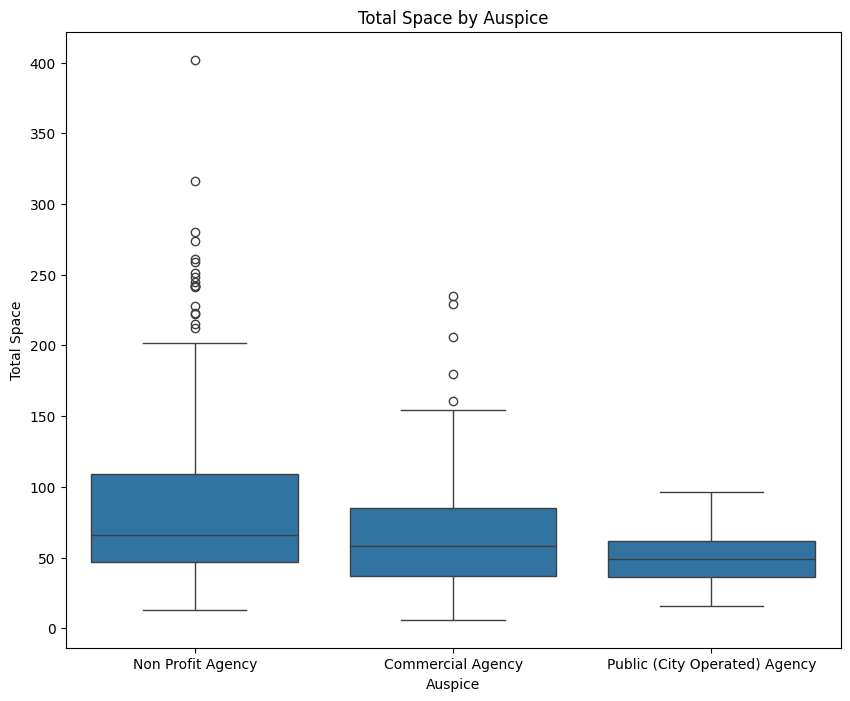

normality results:
AUSPICE
Commercial Agency                1.013541e-11
Non Profit Agency                8.339871e-22
Public (City Operated) Agency    9.225869e-02
Name: TOTSPACE, dtype: float64

one-way anova table:
                  sum_sq      df          F        PR(>F)
C(AUSPICE)  9.611211e+04     2.0  21.843051  5.057716e-10
Residual    2.332065e+06  1060.0        NaN           NaN



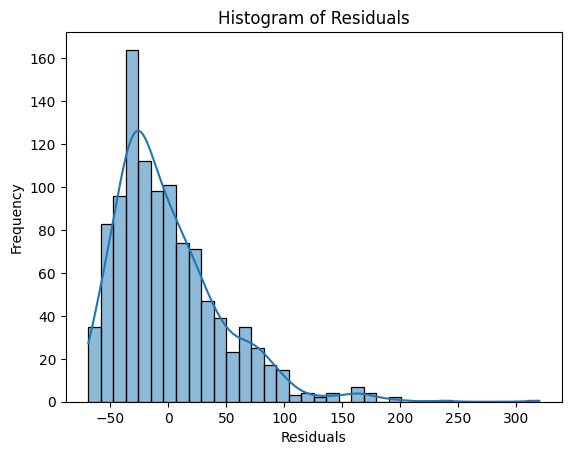

                             sum_sq      df          F        PR(>F)
C(AUSPICE)             8.567996e+03     2.0   2.057586  1.282730e-01
C(subsidy)             8.352744e+04     1.0  40.117876  3.529094e-10
C(AUSPICE):C(subsidy)  5.603445e+04     2.0  13.456555  1.694282e-06
Residual               2.202809e+06  1058.0        NaN           NaN


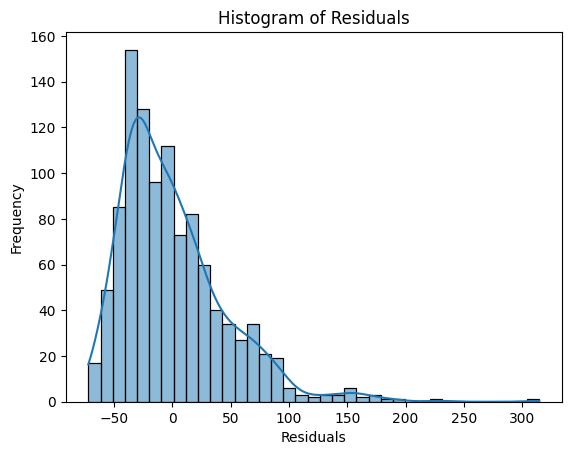

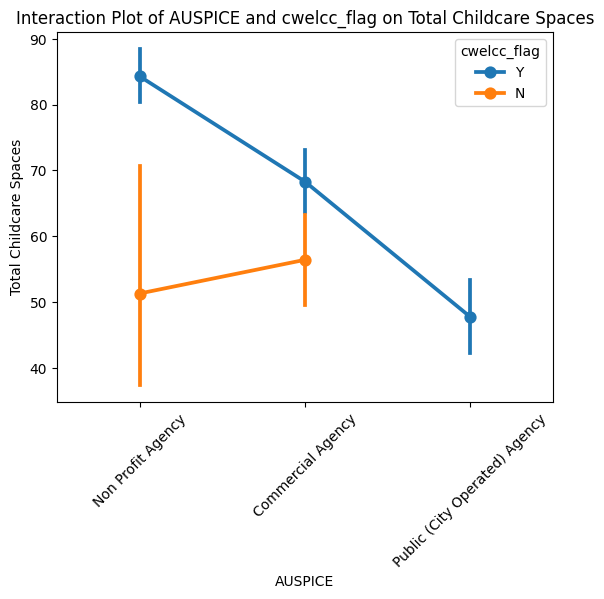

tukey summary: 
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
      group1                  group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency  17.1194    0.0   9.7037  24.5351   True
Commercial Agency Public (City Operated) Agency -17.2152 0.0779 -35.8832   1.4528  False
Non Profit Agency Public (City Operated) Agency -34.3346    0.0 -52.4448 -16.2244   True
----------------------------------------------------------------------------------------


In [ ]:
# Danika Mariam (1004014880)
# INF2178: Assignment 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# load dataset
from google.colab import drive, files
drive.mount("/drive", force_remount=True)
data = pd.read_excel("/drive/MyDrive/INF2178_A2_data.xlsx")

# first few rows of the dataset
print(data.head())

# data types and missing values
print(data.info())

#summary stats
print(data.describe())

# Box plot of TOTSPACE by auspice
plt.figure(figsize=(10, 8))
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=data)
plt.title('Total Space by Auspice')
plt.xlabel('Auspice')
plt.ylabel('Total Space')
plt.show()

# Shapiro-Wilk test for normality within each auspice group
normality_results = data.groupby('AUSPICE')['TOTSPACE'].apply(lambda x: stats.shapiro(x)[1])
print("normality results:")
print(normality_results)
print()

# one-way ANOVA
one_way = ols('TOTSPACE ~ C(AUSPICE)', data=data).fit()
one_way_table = sm.stats.anova_lm(one_way, typ=2)
print("one-way anova table:")
print(one_way_table)
print()

# residuals normally distributed
sns.histplot(one_way.resid, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Two-Way ANOVA with 'AUSPICE' and 'subsidy' as the independent variables and 'TOTSPACE' as the dependent variable.
model_1 = ols('TOTSPACE ~ C(AUSPICE) * C(subsidy)', data=data).fit()
anova_table_1 = sm.stats.anova_lm(model_1, typ=2)
print(anova_table_1)

# residuals normally distributed
sns.histplot(model_1.resid, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# interaction plot
sns.pointplot(data=data, x='AUSPICE', y='TOTSPACE', hue='cwelcc_flag')
plt.title('Interaction Plot of AUSPICE and cwelcc_flag on Total Childcare Spaces')
plt.xlabel('AUSPICE')
plt.ylabel('Total Childcare Spaces')
plt.xticks(rotation=45)
plt.show()

# post-hoc tests, tukey
tukey = pairwise_tukeyhsd(endog=data['TOTSPACE'], groups=data['AUSPICE'], alpha=0.05)
print("tukey summary: ")
print(tukey.summary())
